> CS324 Assignment 3

#### Task 2.1

The models are pre-trained. If no pre-trained models included, please run `python part2/my_gan.py` at first.

CURRENT DEVICE:  cuda:0


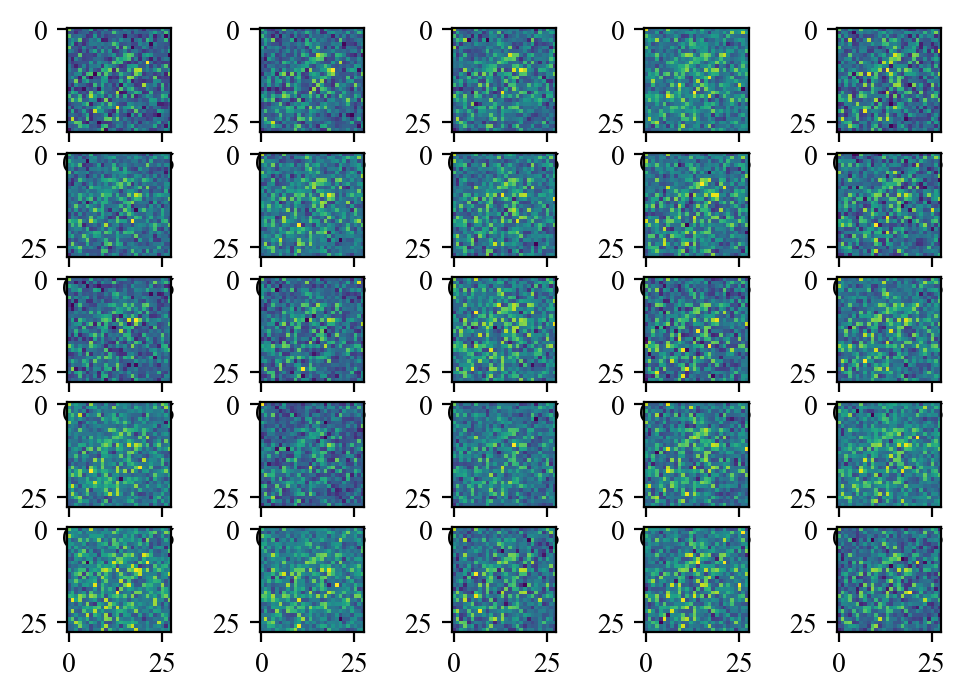

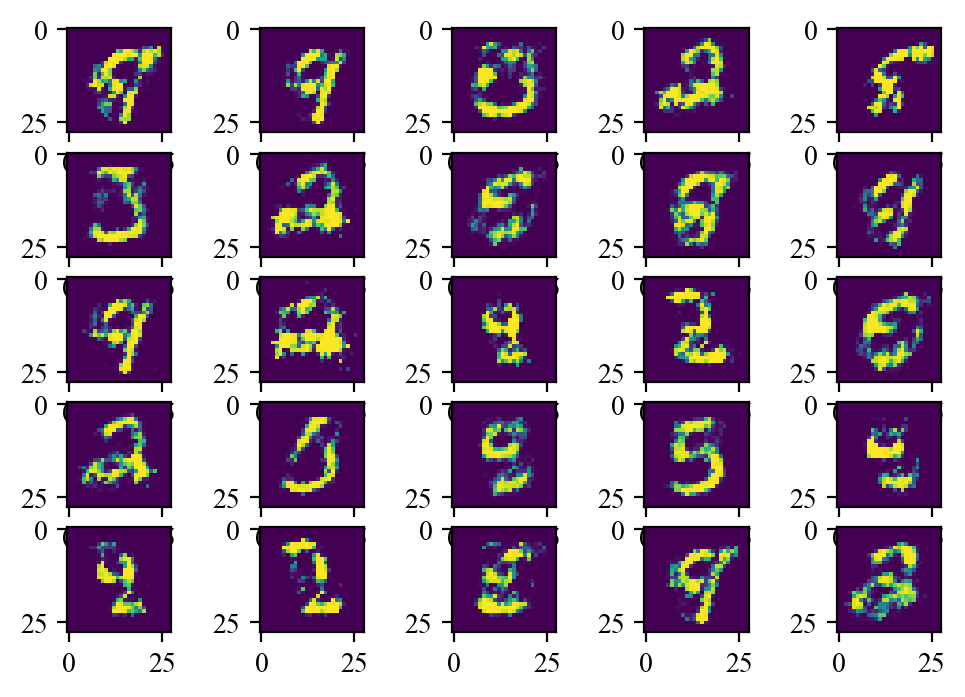

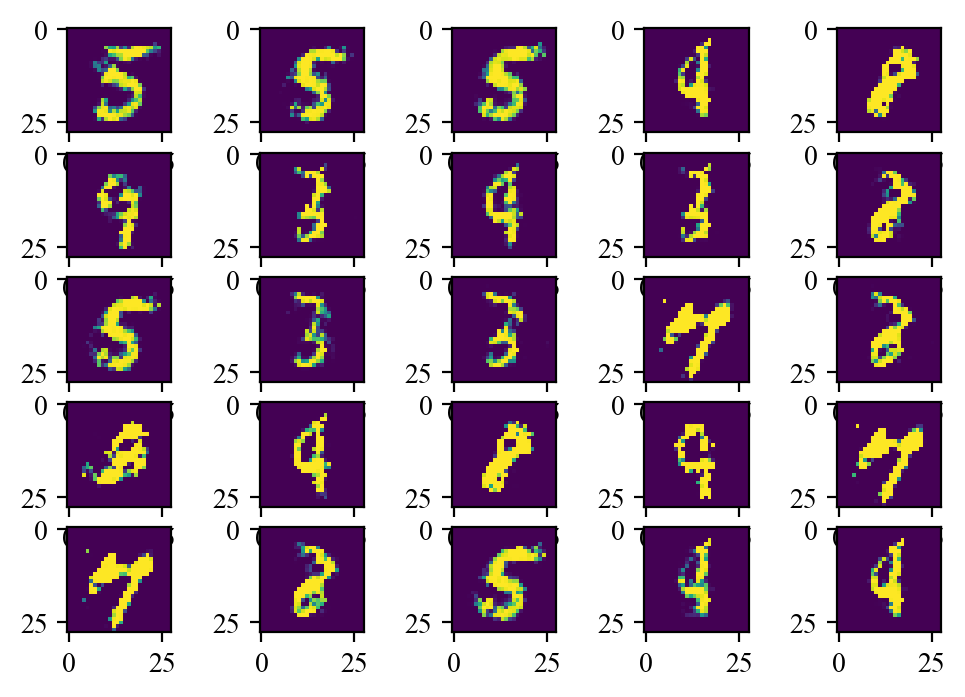

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from my_gan import Generator

plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["figure.dpi"] = 200

DATA_DIR = './data/mnist'
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
IMAGES = 25
LATENT_DIM = 100
IMAGE_WIDTH = 28
CHECKPOINTS = ['mnist_generator_start.pth', 'mnist_generator_mid.pth', 'mnist_generator_final.pth']

for checkpoint_name in CHECKPOINTS:
    current_state_dict = torch.load(checkpoint_name)
    generator_model = Generator(LATENT_DIM, IMAGE_WIDTH*IMAGE_WIDTH)
    generator_model.load_state_dict(current_state_dict)
    generator_model.to(DEVICE).eval()
    z = torch.autograd.Variable(torch.randn(IMAGES, LATENT_DIM)).to(DEVICE, torch.float32)
    # prepare model and data
    
    generated_imgs = generator_model(z)
    generated_imgs = generated_imgs.reshape(IMAGES, IMAGE_WIDTH, IMAGE_WIDTH)
    generated_imgs = generated_imgs.detach().to('cpu').numpy()
    # transfer generated images from [i, w*h] to [i, width, height]
    
    plt.figure()
    plt.title(checkpoint_name)
    subplot_x_count, subplot_y_count = int(np.ceil(np.sqrt(IMAGES))), int(np.ceil(np.sqrt(IMAGES)))
    for i in range(IMAGES):
        plt.subplot(subplot_x_count, subplot_y_count, i + 1)
        plt.imshow(generated_imgs[i, :, :])
    plt.show()


#### Task 2.3

*This task need manual operations in the first step.*

Run this code block and it will give two images. Check if these two images are of the same class, if so, re-run this code block.

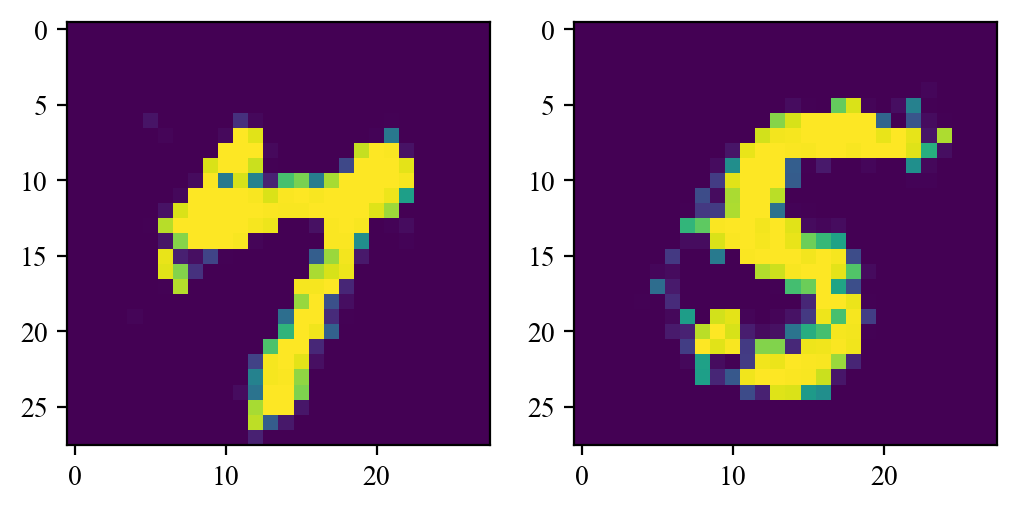

In [4]:
current_state_dict = torch.load('mnist_generator_final.pth')
generator_model = Generator(LATENT_DIM, IMAGE_WIDTH*IMAGE_WIDTH)
generator_model.load_state_dict(current_state_dict)
generator_model.to(DEVICE).eval()
z1 = torch.autograd.Variable(torch.randn(1, LATENT_DIM)).to(DEVICE, torch.float32)
z2 = torch.autograd.Variable(torch.randn(1, LATENT_DIM)).to(DEVICE, torch.float32)
# prepare model and data

img1 = generator_model(z1)
img1 = img1.reshape(IMAGE_WIDTH, IMAGE_WIDTH)
img1 = img1.detach().to('cpu').numpy()

img2 = generator_model(z2)
img2 = img2.reshape(IMAGE_WIDTH, IMAGE_WIDTH)
img2 = img2.detach().to('cpu').numpy()
# transfer generated images from [i, w*h] to [i, width, height]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

If upper two images are of different categories, run the following code to see the interploation result.

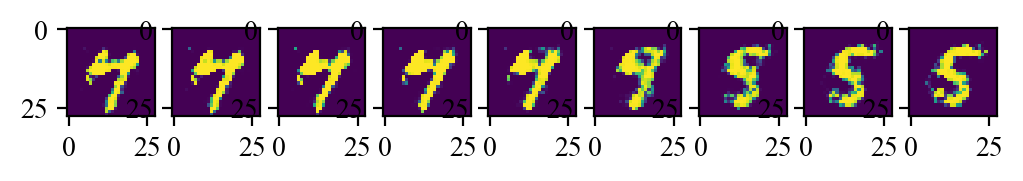

In [6]:
interp_start = z1.detach().to('cpu').numpy().reshape(-1)
interp_end = z2.detach().to('cpu').numpy().reshape(-1)

interp_matrix = np.linspace(interp_start, interp_end, 9)
interp_tensor = torch.from_numpy(interp_matrix).to(DEVICE, torch.float32)

generate_images = generator_model(interp_tensor)
generate_images = generate_images.reshape(9, IMAGE_WIDTH, IMAGE_WIDTH)
generate_images = generate_images.detach().to('cpu').numpy()

plt.figure()
for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.imshow(generate_images[i, :, :])
plt.show()
